In [1]:
from files.utils.constants import *
from files.utils.utility_functions import *
from files.classes.neural_models import *

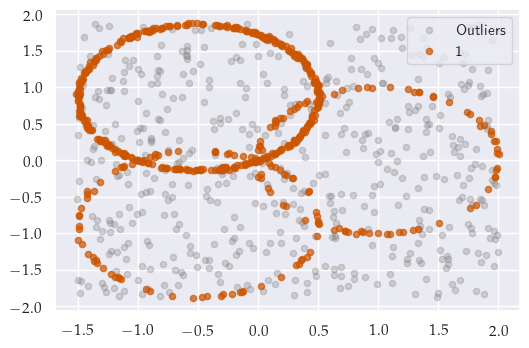

In [2]:
ds, gt = load_dataset_by_name(base_path="/home/catonz/Neural-PreferenceIsolation/", name="circle3", with_outliers=True)
plot_clusters(gt, ds)
x = np.linspace(np.min(ds[:,0]), np.max(ds[:,1]), len(ds))

In [14]:
model = NeuralNetwork(neurons=[2, 16, 4, 1, 4, 16, 2], activation=torch.tanh)
model.fit(ds, epochs=500, print_training=True, lr=1e-2);

Epoch 500/500: [==============================] (100%) ETA: 0:00:33.713618 Mean Loss: 0.21533


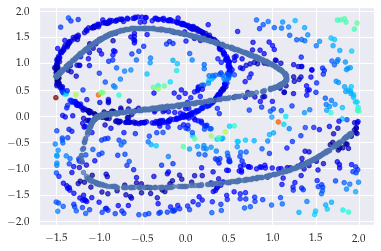

In [15]:
preds = model.predict(ds)
plot(ds, c=model.get_residuals(ds), cmap="jet")
plot(preds)

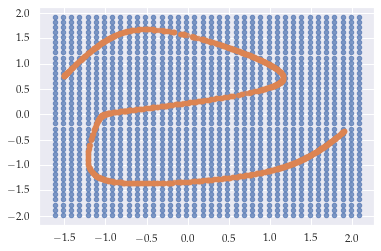

In [16]:
x0_min, x0_max = ds[:, 0].min() - .1, ds[:, 0].max() + .1
x1_min, x1_max = ds[:, 1].min() - .1, ds[:, 1].max() + .1

h = .1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                        np.arange(x1_min, x1_max, h))
data = np.c_[xx0.ravel(), xx1.ravel()]

preds = model.predict(data)

plot(data)
# plot(ds)
plot(preds)